In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
# the above is really for notational convenience:
# poly.xyz() will be the same as np.polynomial.polynomial.xyz() but much quicker to write and read!
from matplotlib import pyplot as plt
%matplotlib inline

## The basics
Let's look at a simple example: we have 9 digits on the x axis and a polynomial y = 4x^2 + 4x + 3, so we have the following values for x and y:

In [2]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = 4*x**2 + 4*x + 3
print(x, y)

[1 2 3 4 5 6 7 8 9] [ 11  27  51  83 123 171 227 291 363]


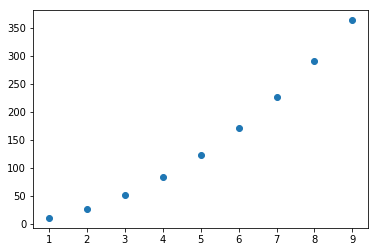

In [3]:
plt.scatter(x,y)

The function <b>np.polynomial.polynomial.polyfit()</b> finds the best co-efficients that will fit this data and returns them in <i>ascending order</>, i.e. intercept, x, x^2, x^3, etc. In our case, since we have pre-constructed the example it returns exactly the co-efficients we are expecting so we can see how it's working under the hood!

In [4]:
coefs = poly.polyfit(x, y, 2)
print(coefs)

[ 3.  4.  4.]


The function np.polynomial.polynomial.polyval() takes 2 arguments in order to return the corresponding y values - values for x and the array of values returned by polyfit():

In [5]:
poly.polyval(x, coefs)

array([  11.,   27.,   51.,   83.,  123.,  171.,  227.,  291.,  363.])

We can then visualize how closely the suggested fit line matches the original data:

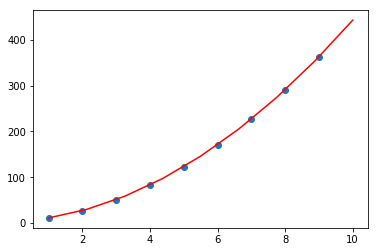

In [6]:
# Note that we use np.linspace() to generate general x values, evenly spaced
# In this example it amounts to the same thing, but normally it wouldn't of course!
new_x = np.linspace(1, 10, 9)
new_y = poly.polyval(new_x, coefs)
plt.scatter(x,y)
plt.plot(new_x, new_y, c = "r")

In [7]:
# btw, what happens if we pick too many terms, e.g. instead of the original 2 we picked 4?
coefs = poly.polyfit(x, y, 4)
print(coefs)

[  3.00000000e+00   4.00000000e+00   4.00000000e+00  -4.10057513e-15
   1.89553259e-16]


In [8]:
# Notice that the co-efficients for x^4 and x^3 are sooo small 
# that they are going to basically reduce their effect as terms to negligible
# -4.10E-15 = -0.0000000000000041005751300
# 1.90E-16 = 0.0000000000000001895532590

## Using 'real' data

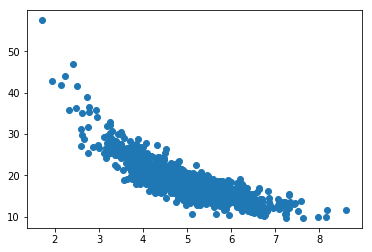

In [9]:
# Here we are just getting some random data to work with for the purposes of illustration
np.random.seed(5)
x = np.random.normal(5.0, 1.0, 1000)
y = np.random.normal(90.0, 10.0, 1000) / x
plt.scatter(x, y)

In [10]:
# Let's start with one x term only (essentially linear regression)
coefs = poly.polyfit(x, y, 1)
print(coefs)

[ 39.10294365  -4.06486654]


In [11]:
# We can actually see that the result is just like using stats.linregress():
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(intercept, slope)

39.102943645 -4.06486653659


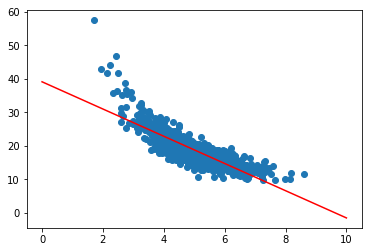

In [12]:
# Clearly not a good fit!
new_x = np.linspace(0, 10, 1000)
new_y = poly.polyval(new_x, coefs)
plt.scatter(x,y)
plt.plot(new_x, new_y, c = "r")

In [13]:
# So let's bump it up to 2 x terms and see what happens...
coefs = poly.polyfit(x, y, 2)
print(coefs)

[ 62.6445633  -13.79259683   0.96606278]


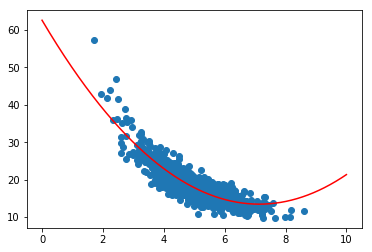

In [14]:
# Looks better!
new_x = np.linspace(0, 10, 1000)
new_y = poly.polyval(new_x, coefs)
plt.scatter(x,y)
plt.plot(new_x, new_y, c = "r")

In [15]:
# What about 3 terms?
coefs = poly.polyfit(x, y, 3)
print(coefs)

[ 89.35580219 -31.12792172   4.54058811  -0.23551848]


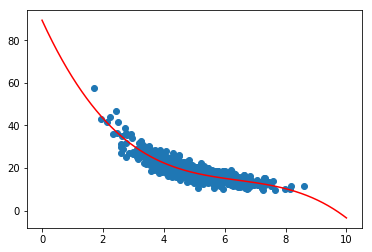

In [16]:
# Interesting, instead of curving up for high values, it now curves down... that may or may not be appropriate
new_x = np.linspace(0, 10, 1000)
new_y = poly.polyval(new_x, coefs)
plt.scatter(x,y)
plt.plot(new_x, new_y, c = "r")